### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv("CarPrice.csv")

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Distribution of Car Prices

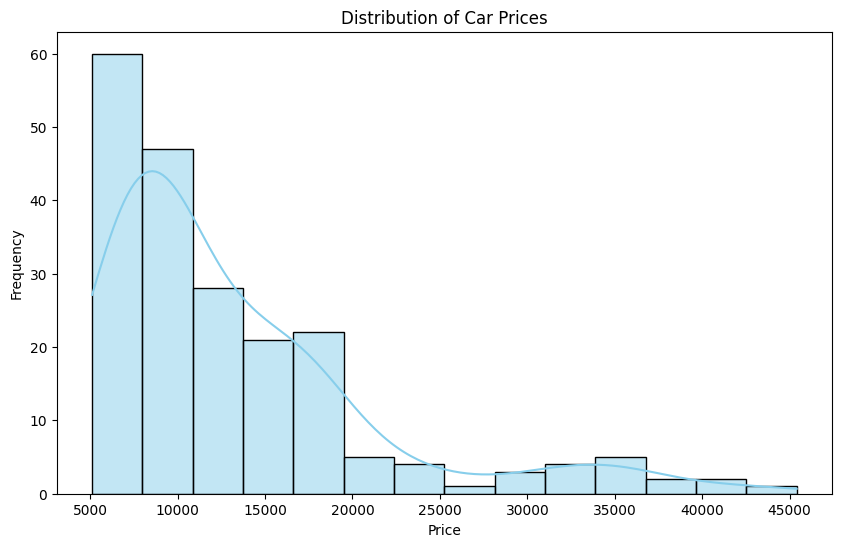

In [4]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of prices using Seaborn's distplot
sns.histplot(data['price'], kde=True, color='skyblue')

# Add labels and title
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Scatterplot

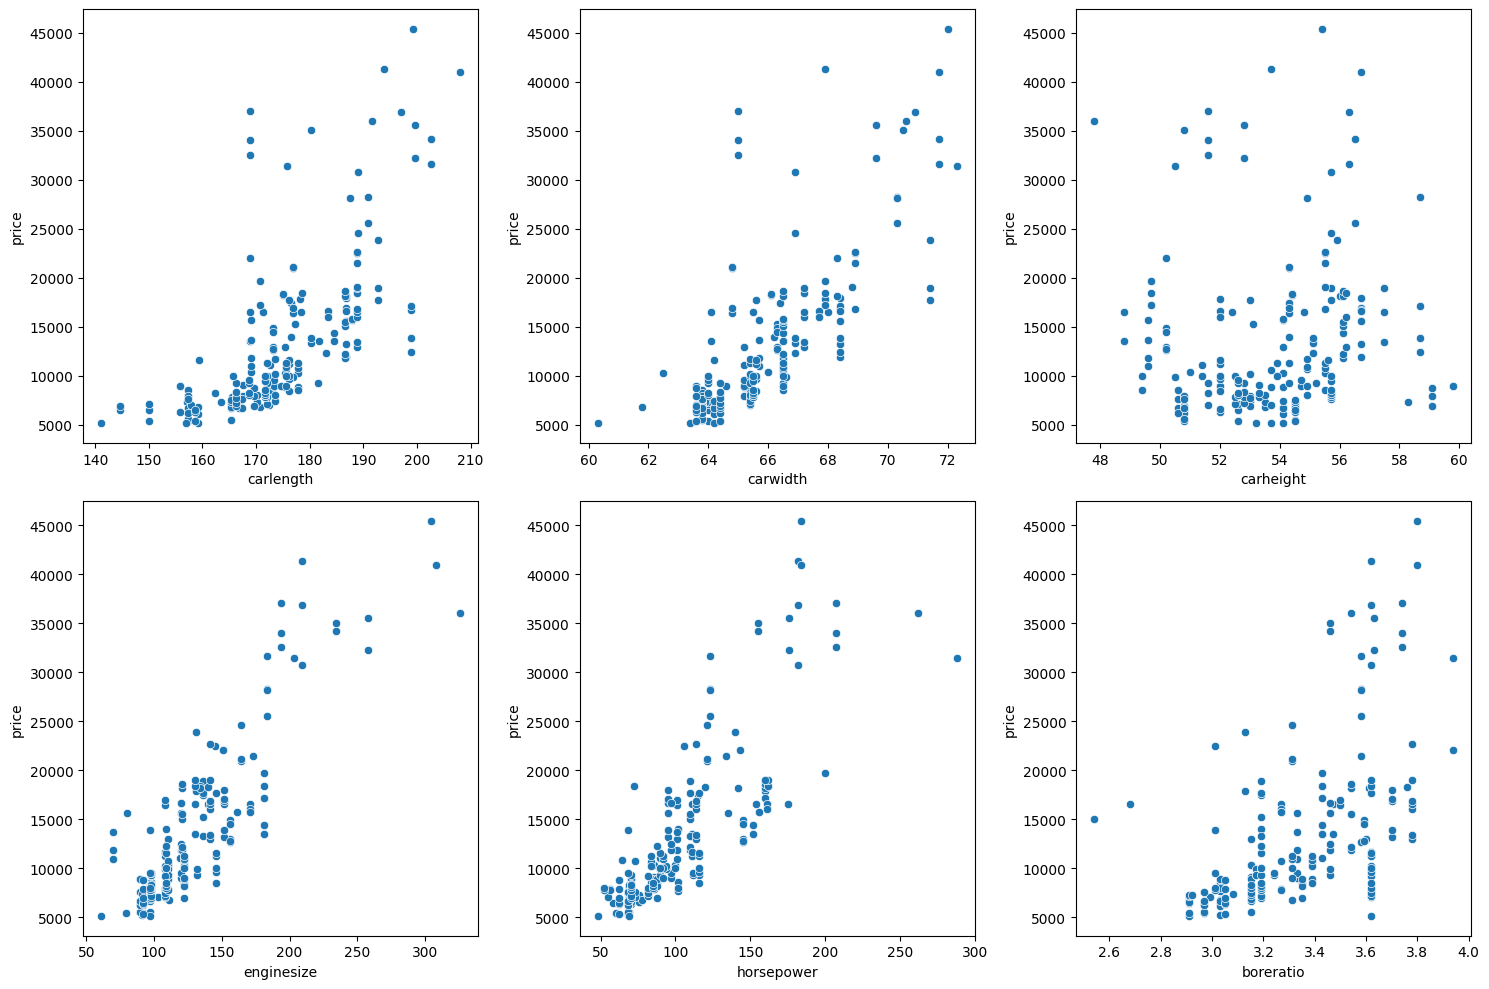

In [5]:
# Define the features and their corresponding positions in the subplot grid
features = ['carlength', 'carwidth', 'carheight', 'enginesize', 'horsepower', 'boreratio']
positions = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]

# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each feature in the corresponding subplot
for i, (feat, pos) in enumerate(zip(features, positions)):
    sns.scatterplot(data=data, x=feat, y='price', ax=axs[pos[0], pos[1]])
    
# Remove empty subplots (if any)
if len(features) < 6:
    for i in range(len(features), 2):
        for j in range(3):
            fig.delaxes(axs[i, j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [6]:
data[features]

,carlength,carwidth,carheight,enginesize,horsepower,boreratio
0,168.8,64.1,48.8,130,111,3.47
1,168.8,64.1,48.8,130,111,3.47
2,171.2,65.5,52.4,152,154,2.68
3,176.6,66.2,54.3,109,102,3.19
4,176.6,66.4,54.3,136,115,3.19
...,...,...,...,...,...,...
200,188.8,68.9,55.5,141,114,3.78
201,188.8,68.8,55.5,141,160,3.78
202,188.8,68.9,55.5,173,134,3.58
203,188.8,68.9,55.5,145,106,3.01


### Normalize Features

In [7]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm

In [8]:
x_train = normalize_features(data[features].to_numpy())
y_train = data['price'].to_numpy()

In [9]:
print(f"Shape of X: {x_train.shape}")
print(f"Shape of y: {y_train.shape}")

Shape of X: (205, 6)
Shape of y: (205,)


In [10]:
x_train = x_train.reshape(6, 205)
y_train = y_train.reshape(1, 205)

### Multiple Linear Regression

In [11]:
class MultipleLinearRegression():
    def __init__(self):
        self.W = None
        self.b = None
        self.m = None
        
    def predict(self,X):
        try:
            y_pred=np.dot(self.W.T,X)+self.b
            return y_pred
        except AttributeError:
            print('First train your data using fit function and then predict')

    def compute_loss(self, y_pred, y_true):
        loss = np.sum(np.square(y_pred - y_true)) / (self.m)
        return loss
    
    def fit(self, X, y, learning_rate=0.00001, iterations=1000):
        self.m = X.shape[0]
        self.W = np.random.randn(self.m, 1)
        self.b = np.random.randn()
        y_pred = self.predict(X)
        loss = self.compute_loss(y_pred, y)
        losses = []
        losses.append(loss)
        
        for i in range(iterations):
            dw = np.dot(X, (y_pred-y).T) / self.m
            db = np.sum(y_pred - y) / self.m
            self.W = self.W - (learning_rate*dw)
            self.b = self.b - (learning_rate*db)
            y_pred = self.predict(X)
            loss = self.compute_loss(y_pred,y)
            losses.append(loss)
            
            if (i+1)%100 == 0:
                print('loss at iteration number '+str(i+1)+' is : ',losses[i])
        
        plt.title('Multiple Linear Regression')
        plt.plot(losses)
        plt.xlabel('no. of iterations')
        plt.ylabel('loss')
        plt.show()

In [12]:
model = MultipleLinearRegression()

loss at iteration number 100 is :  7661642429.383583
loss at iteration number 200 is :  7181194016.131417
loss at iteration number 300 is :  6751788524.49329
loss at iteration number 400 is :  6367444728.603574
loss at iteration number 500 is :  6022912766.678245
loss at iteration number 600 is :  5713582989.998726
loss at iteration number 700 is :  5435406273.37803
loss at iteration number 800 is :  5184824339.772622
loss at iteration number 900 is :  4958708834.856126
loss at iteration number 1000 is :  4754308047.321616
loss at iteration number 1100 is :  4569200310.369187
loss at iteration number 1200 is :  4401253241.832211
loss at iteration number 1300 is :  4248588086.942039
loss at iteration number 1400 is :  4109548520.7847247
loss at iteration number 1500 is :  3982673348.774488
loss at iteration number 1600 is :  3866672614.450476
loss at iteration number 1700 is :  3760406685.8992257
loss at iteration number 1800 is :  3662867946.254126
loss at iteration number 1900 is :  3

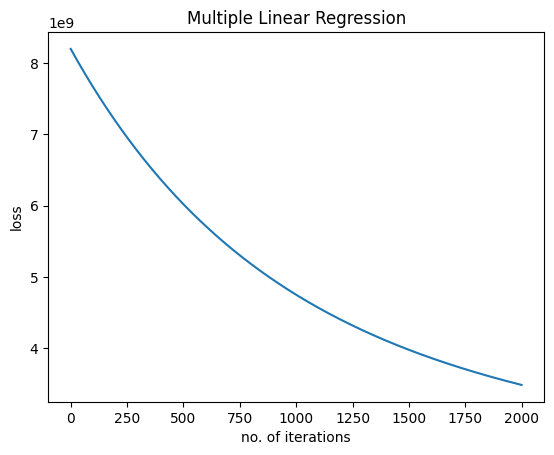

In [13]:
model.fit(x_train, y_train, iterations=2000)